# MNIST Handwritten Digits

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. We can see that images are just matrices with scalar values so we can apply the different classification algorithms on them.

Because both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST.

Our goal is to use scikit-learn machine learning to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We used the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms. [This website](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) explains why scaling is important.

In [20]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

### Importing & Scaling the Data

In [21]:
# Import Data
digits = load_digits()

# Scale Data & Create Variables
X = scale(digits.data)
y = digits.target
print(type(X))

<class 'numpy.ndarray'>


### Exploratory data analysis 

In [22]:
# Number of Samples, Features, and Digits
n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

# This is what one digit (a zero) looks like

print("=======\nThe digit")
print(digits.target[0])

print("=======\nThe raw data")
print(digits.images[0])

print("=======\nThe scaled data")
print(X[0])

n_digits: 10, n_samples 1797, n_features 64
The digit
0
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0

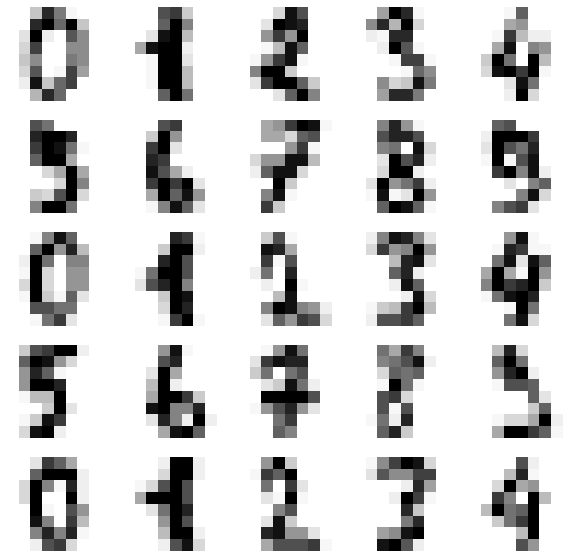

In [23]:
# plot a few of the images

plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(digits.images[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.savefig('ExampleNumbers')
plt.show()

## Classification Tools

### Classification with Support Vector Machines (SVM)

We develop a support-vector machine classification model for the data. In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. It uses the support-vector classifier which splits the data with a soft margin (the distance between the observations and the threshold) and some misclassifications.

1. Using Train Test Split validation procedure, we split the data into a training and test set. 
2. We use SVM to build a classifier using the *training dataset*.
3. We will find the misclassified digits.
3. Using the 'cross_val_score' function, we evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500.
4. We will train and test the algorithm on the raw (non-scaled) data.

In [24]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
clf = svm.SVC(kernel='rbf', C=100)
clf.fit(X_train, y_train)

# Generate Confusion Matrix
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
confusionmatrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Accuracy of Model:", accuracy)
print(confusionmatrix)

Accuracy of Model: 0.9534075104311543
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]


In [25]:
# Misclassified Digits

index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)


[16, 60, 84, 112, 169, 176, 203, 210, 225, 248, 249, 284, 298, 347, 361, 385, 387, 394, 400, 462, 487, 523, 528, 533, 537, 540, 545, 576, 591, 635, 648, 683, 721, 726, 735, 738, 755, 757, 782, 785, 799, 891, 932, 957, 971, 999, 1032, 1040, 1085, 1089, 1090, 1108, 1120, 1149, 1198, 1217, 1230, 1255, 1265, 1273, 1283, 1342, 1346, 1356, 1371, 1394, 1395]


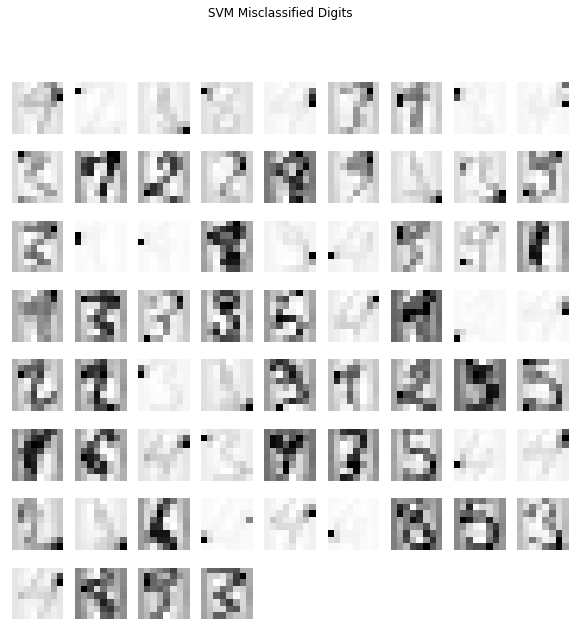

In [40]:
plt.figure(figsize=(10,10))
plt.suptitle('SVM Misclassified Digits');
for plot_index, bad_index in enumerate(misclassified_images[0:]):
    p = plt.subplot(8, 9, plot_index+1)
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap='Greys',
            interpolation='nearest')
    p.set_xticks(()); p.set_yticks(())
plt.savefig('Misclassified-Digits-SVM')

In [31]:
# Cross Validation for accuracy of SVM

scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores)

[0.93888889 0.99444444 0.98333333 0.95       0.98888889 0.97777778
 0.97222222 0.94972067 0.96648045 0.96089385]


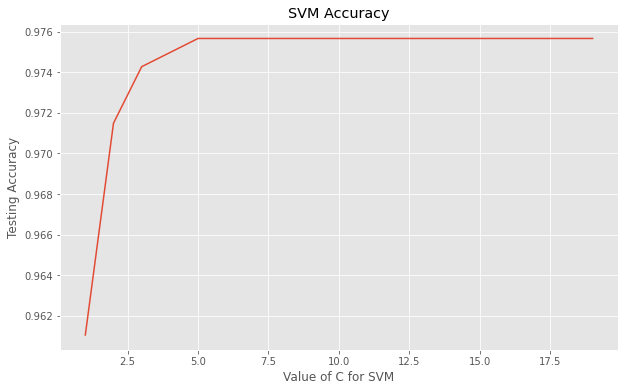

In [32]:
# Raw Data

Xraw = digits.data
yraw = digits.target
Xraw_train, Xraw_test, yraw_train, yraw_test = train_test_split(Xraw, yraw, random_state=1, test_size=0.8)
scores = []
C_range = range(1,20)
for C in C_range:
    clf = svm.SVC(kernel='rbf', C=C)
    clf.fit(Xraw_train, yraw_train)
    y_pred = clf.predict(Xraw_test)
    scores.append(metrics.accuracy_score(yraw_test, y_pred))

# print(scores)
plt.plot(C_range, scores)
plt.title('SVM Accuracy')
plt.xlabel('Value of C for SVM')
plt.ylabel('Testing Accuracy')
plt.savefig('SVM-Accuracy')

In [33]:
# Accuracy of Raw Data

Xraw = digits.data
yraw = digits.target
Xraw_train, Xraw_test, yraw_train, yraw_test = train_test_split(Xraw, yraw, random_state=1, test_size=0.8)
clfraw = svm.SVC(kernel='rbf', C=10)
clfraw.fit(Xraw_train, yraw_train)

yraw_pred = clfraw.predict(Xraw_test)
accuracyraw = metrics.accuracy_score(y_true=yraw_test, y_pred=yraw_pred)
print("Accuracy of Raw Model:", accuracyraw)

Accuracy of Raw Model: 0.9756606397774688


Using the SVM classifier with C = 100, the accuracy score is 0.95 with the scaled training data. The most common mistake that the SVM classifier makes is in cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform. The SVM classifier does not perform very well when the data set has more noise such that the target classes are overlapping. The best score from the 'cross_val_score' function is the score of 0.99. With the raw or unscaled data, the accuracy score is 0.975. Additionally based on the chart, the best C value is 5.

### Prediction with K-Nearest Neighbors (K-NN)

The K-nearest neighbors (K-NN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. It categories unknown variables into different clusters. In our study, we will try out different values to choose the value of K. Low values of K can be noisy and subject the effects of outliers. Large values of K smooth over things, but you don't want K to be so large that a category with only a few samples in it will always be out voted by other categories. We will be using training data, data used for initial clustering (data where we know the categories in advance) to calculate the accuracy of the data.

We develop a K-NN classification model for the data and use cross validation to choose the best value of K. First we will look at K = 10.

In [35]:
# Splitting data into training and test set with K = 10
k = 10
X_traink, X_testk, y_traink, y_testk = train_test_split(X, y, random_state=1, test_size=0.8)
clfk = KNeighborsClassifier(n_neighbors=k)
clfk.fit(X_traink, y_traink)

y_predk = clfk.predict(X_testk)
accuracyk = metrics.accuracy_score(y_true=y_testk, y_pred=y_predk)
confusionmatrix = metrics.confusion_matrix(y_true=y_testk, y_pred=y_predk)
print("Accuracy of Model:", accuracyk)
print(confusionmatrix)

Accuracy of Model: 0.9123783031988874
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]


In [36]:
index = 0
misclassified_imagesk = []
for label, predict in zip(y_testk, y_predk):
    if label != predict: 
        misclassified_imagesk.append(index)
    index +=1
print(misclassified_imagesk)

[16, 25, 74, 77, 80, 102, 112, 138, 169, 171, 172, 176, 178, 185, 193, 210, 214, 225, 251, 262, 269, 284, 288, 298, 325, 337, 347, 353, 361, 385, 387, 392, 394, 396, 400, 426, 434, 441, 462, 473, 504, 511, 523, 528, 535, 537, 540, 555, 565, 576, 600, 619, 635, 648, 683, 687, 694, 697, 701, 708, 726, 730, 735, 742, 748, 757, 763, 768, 778, 791, 793, 796, 798, 799, 801, 811, 821, 829, 834, 857, 860, 882, 932, 937, 957, 958, 971, 976, 979, 1004, 1022, 1032, 1044, 1089, 1090, 1091, 1095, 1096, 1105, 1108, 1121, 1130, 1149, 1154, 1158, 1161, 1194, 1206, 1221, 1230, 1260, 1266, 1282, 1283, 1294, 1318, 1320, 1336, 1342, 1363, 1371, 1376, 1388, 1392, 1394, 1396]


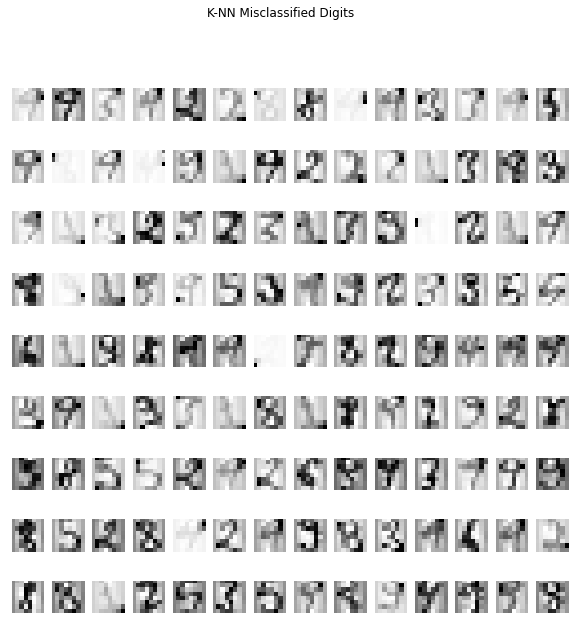

In [39]:
plt.figure(figsize=(10,10))
plt.suptitle('K-NN Misclassified Digits');
for plot_indexk, bad_indexk in enumerate(misclassified_imagesk[0:]):
    p = plt.subplot(9, 14, plot_indexk+1)
    
    p.imshow(X_test[bad_indexk].reshape(8,8), cmap='Greys',
            interpolation='nearest')
    p.set_xticks(()); p.set_yticks(())
plt.savefig('Misclassified-Digits-KNN')

In [41]:
# Cross Validation KNN
scores = cross_val_score(clfk, X, y, cv=10, scoring='accuracy')
print(scores)

[0.91666667 0.96111111 0.96666667 0.9        0.95       0.96666667
 0.97222222 0.95530726 0.95530726 0.93854749]


[0.9666203059805285, 0.9575799721835884, 0.954798331015299, 0.9520166898470097, 0.9513212795549374, 0.9450625869262865, 0.9471488178025035, 0.9408901251738526, 0.9388038942976356]


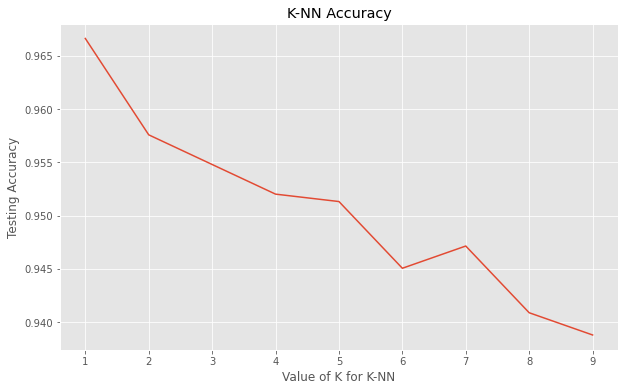

In [44]:
# Raw Data

Xraw = digits.data
yraw = digits.target
X_traink, X_testk, y_traink, y_testk = train_test_split(Xraw, yraw, random_state=1, test_size=0.8)
scores = []
k_range = range(1,10)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_traink, y_traink)
    y_predk = knn.predict(X_testk)
    scores.append(metrics.accuracy_score(y_testk, y_predk))

print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for K-NN')
plt.ylabel('Testing Accuracy')
plt.title('K-NN Accuracy')
plt.savefig('K-NN-Accuracy')

In [45]:
# Accuracy of Raw Data

clfk = KNeighborsClassifier(n_neighbors=1)
clfk.fit(X_traink, y_traink)

y_predk = clfk.predict(X_testk)
accuracyk = metrics.accuracy_score(y_true=y_testk, y_pred=y_predk)
print("Accuracy of Raw Model:", accuracyk)

Accuracy of Raw Model: 0.9666203059805285


Using the K-NN We would need to manually remove missing values and outliers. The K-NN classifier could potentially generate wrong predictions because of the lack of scaling. The best score from the 'cross_val_score' function is the score of 0.97 of the test accuracy. With the raw or unscaled data, the best accuracy score is achieved with K = 1 and it is 0.967.